In [1]:
%cd C:\Users\chakr\OneDrive\Desktop\sujith

C:\Users\chakr\OneDrive\Desktop\sujith


C:\Users\chakr\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
#from pycocotools.coco import COCO
import urllib
import zipfile

In [2]:
import os
import shutil

# Define the source and destination paths
source_folders = ['United_States','Japan','India','Norway','Czech','China_Drone','China_MotorBike']
destination_data_folder = 'data'
destination_label_folder = 'annotations'

# Create necessary folders
os.makedirs(destination_data_folder, exist_ok=True)
os.makedirs(destination_label_folder, exist_ok=True)

# Copy train images and annotations (xmls) to the respective folders
for folder in source_folders:
    train_images_path = os.path.join(folder, 'train', 'images')
    train_annotations_path = os.path.join(folder, 'train', 'annotations', 'xmls')

    # Copy train images
    for filename in os.listdir(train_images_path):
        shutil.copy(os.path.join(train_images_path, filename), destination_data_folder)

    # Copy annotations
    for filename in os.listdir(train_annotations_path):
        shutil.copy(os.path.join(train_annotations_path, filename), destination_label_folder)


In [4]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(float(bbx.find('xmin').text))
            ymin = int(float(bbx.find('ymin').text))
            xmax = int(float(bbx.find('xmax').text))
            ymax = int(float(bbx.find('ymax').text))
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():

    image_path = os.path.join(os.getcwd(), 'annotations')
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('labels.csv', index=None)
    print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.


In [5]:
file_path = 'labels.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

print(df['width'].value_counts())
print(df['height'].value_counts())

                 filename  width  height class  xmin  ymin  xmax  ymax
0  China_Drone_000000.jpg    512     512   D10   323   213   390   245
1  China_Drone_000001.jpg    512     512   D10    14    70   198    99
2  China_Drone_000001.jpg    512     512   D00    95   114   120   272
3  China_Drone_000002.jpg    512     512   D00    12   214    68   511
4  China_Drone_000002.jpg    512     512   D00    60     1   112   212
width
600     23526
640     11014
512      8767
720      7996
3643     5585
3650     4320
3        2498
4040     1324
540       316
1024      277
1080       89
Name: count, dtype: int64
height
600     25817
640     11014
512      8767
720      8203
2041     5585
2044     4320
2035     1324
540       316
1024      277
1080       89
Name: count, dtype: int64


(65712, 8)


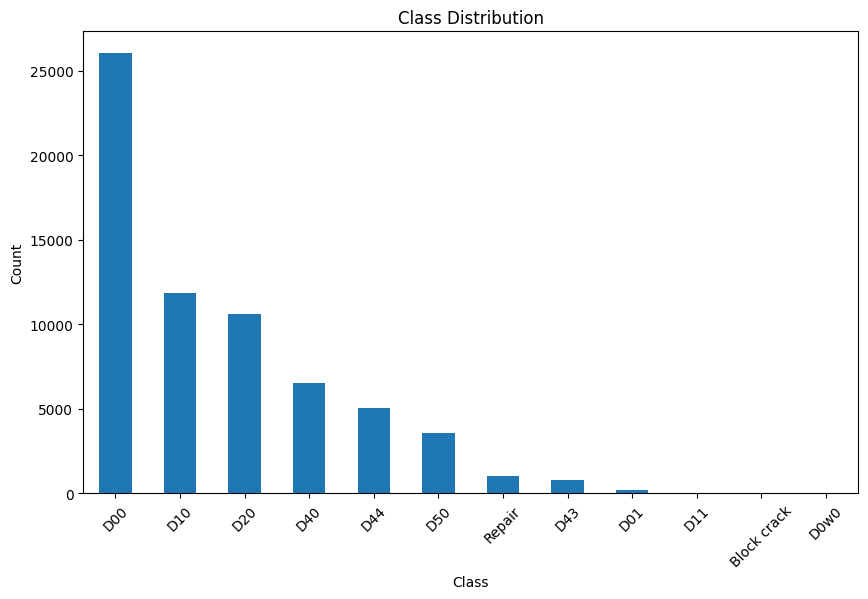

In [6]:

# Calculate class distribution
class_distribution = df['class'].value_counts()

print(df.shape)
# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
uniqueFiles = df['filename'].unique()
print(uniqueFiles.shape)

(26661,)


In [8]:
# List of classes to exclude
exclude_classes1 = ['D43', 'D01', 'D11','Repair','D44','D50','D0w0','Block crack']
exclude_classes2 = ['D43', 'D01', 'D11','Repair','D40','D00','D10','D20','D0w0','Block crack']
# Filter out rows with excluded classes
new_df1 = df[~df['class'].isin(exclude_classes1)]
new_df2 = df[~df['class'].isin(exclude_classes2)]
print(new_df1.shape)
print(new_df1['class'].value_counts())
print(new_df2.shape)
print(new_df2['class'].value_counts())


(55007, 8)
class
D00    26016
D10    11830
D20    10617
D40     6544
Name: count, dtype: int64
(8638, 8)
class
D44    5057
D50    3581
Name: count, dtype: int64


In [9]:
import shutil

# Source folder path
source_folder = 'data/'  # Change this to the path of your source folder

# Destination folder path
destination_folder = 'new_data/'  # Change this to the path of your destination folder

# Copy the folder
shutil.copytree(source_folder, destination_folder)


'new_data/'

(65712, 8)


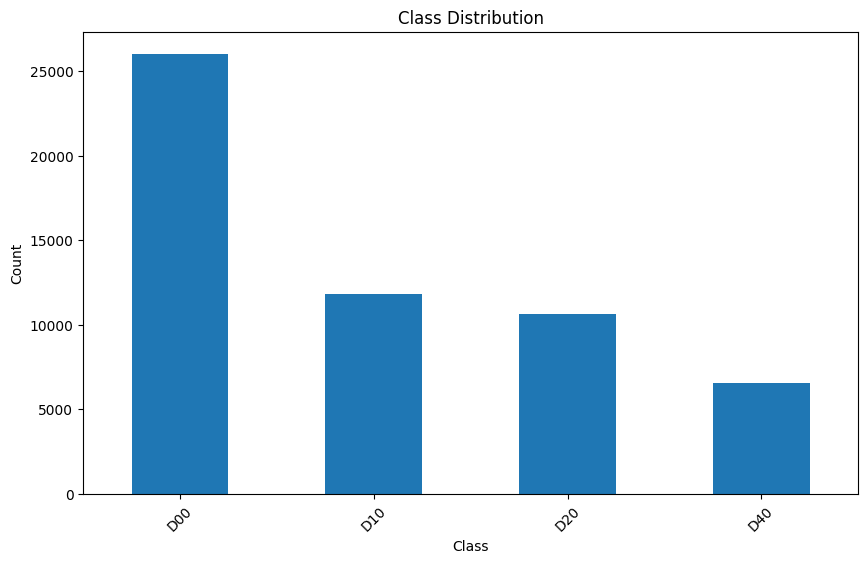

In [10]:
# Calculate class distribution
class_distribution = new_df1['class'].value_counts()

print(df.shape)
# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

(65712, 8)


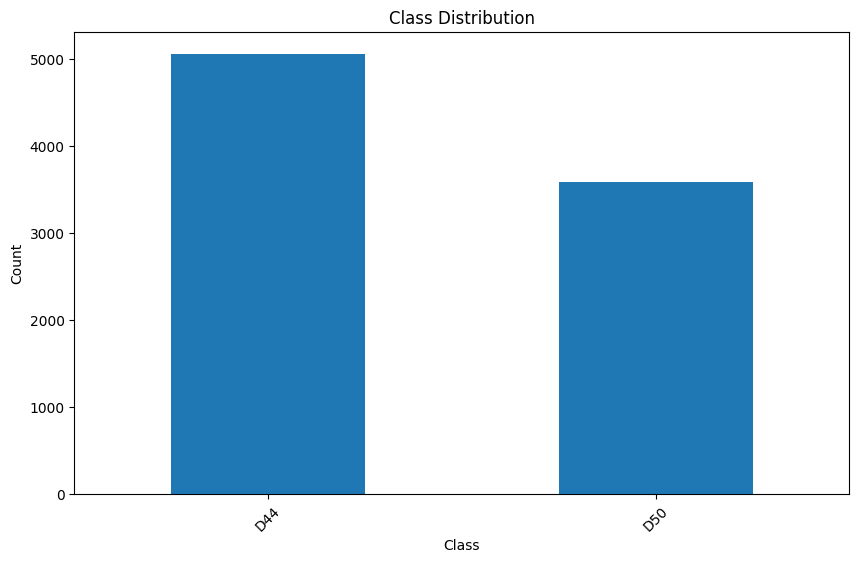

In [11]:
# Calculate class distribution
class_distribution = new_df2['class'].value_counts()

print(df.shape)
# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
filtered_df1 = new_df2[(new_df2['height'].isin([600])) & (new_df2['width'].isin([600]))]
filtered_df2 = new_df1[(new_df1['height'].isin([640])) & (new_df1['width'].isin([640]))]

print(filtered_df1.shape)
print(filtered_df2.shape)

filtered_df = pd.concat([filtered_df1, filtered_df2], ignore_index=True)
print(filtered_df.shape)

print(filtered_df['filename'].unique().shape)

(7365, 8)
(11014, 8)
(18379, 8)
(9874,)


(65712, 8)


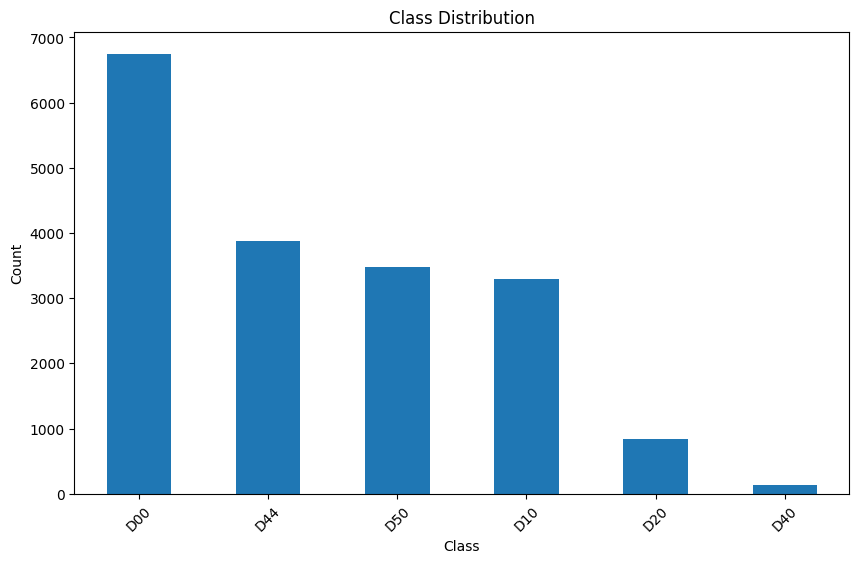

In [13]:
# Calculate class distribution
class_distribution = filtered_df['class'].value_counts()

print(df.shape)
# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
import os

# Directory containing the files
directory = 'data'


# List of filenames to retain
filenames_to_retain = filtered_df['filename'].unique() # Add the filenames you want to retain

# Iterate through files in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename not in filenames_to_retain:
        # Delete the file if its name is not in the list of filenames to retain
        os.remove(filepath)



In [15]:
# Initialize a counter
file_count = 0

# Iterate through files in the directory
for filename in os.listdir(directory):
    # Check if the path is a file (not a directory)
    if os.path.isfile(os.path.join(directory, filename)):
        # Increment the counter
        file_count += 1

# Print the count of files
print(file_count)


9874


In [16]:
import os

# Directory containing the files
directory = 'annotations'

print(filtered_df['filename'].unique())

# List of filenames to retain
filenames_to_retain = filtered_df['filename'].str.replace('.jpg', '.xml').unique() # Add the filenames you want to retain
print(filenames_to_retain)

# Iterate through files in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename not in filenames_to_retain:
        # Delete the file if its name is not in the list of filenames to retain
        os.remove(filepath)

['Japan_000001.jpg' 'Japan_000002.jpg' 'Japan_000004.jpg' ...
 'United_States_004802.jpg' 'United_States_004803.jpg'
 'United_States_004804.jpg']
['Japan_000001.xml' 'Japan_000002.xml' 'Japan_000004.xml' ...
 'United_States_004802.xml' 'United_States_004803.xml'
 'United_States_004804.xml']


In [17]:
# Initialize a counter
file_count = 0

directory = 'annotations'

# Iterate through files in the directory
for filename in os.listdir(directory):
    # Check if the path is a file (not a directory)
    if os.path.isfile(os.path.join(directory, filename)):
        # Increment the counter
        file_count += 1

# Print the count of files
print(file_count)


9874


In [18]:
# Define paths
labels_folder_path = 'labels'

# Create labels folder if it doesn't exist
os.makedirs(labels_folder_path, exist_ok=True)

# Read CSV file
df = filtered_df

# Group data by filename
grouped = df.groupby('filename')

class_label = {
    "D00": 0,
    "D10": 1,
    "D20": 2, 
    "D40": 3,  
    "D44": 4,
    "D50": 5,
    
}
count_bb = 0

# Process each group
for filename, group in grouped:
    # Open a text file with the same name as the image
    with open(os.path.join(labels_folder_path, filename.replace('.jpg', '.txt')), 'w') as f:
        # Iterate over rows in the group

        for index, row in group.iterrows():
            # if filename == 'India_000088.jpg':
            #   print(row['xmin'], row['xmax'], row['width'])
            count_bb += 1
            # Calculate object-class, x_center, y_center, width, and height
            x_center = (row['xmin'] + row['xmax']) / (2 * row['width'])
            y_center = (row['ymin'] + row['ymax']) / (2 * row['width'])
            width = (row['xmax'] - row['xmin']) / row['width']
            height = (row['ymax'] - row['ymin']) / row['width']
            obj_class = class_label[(row['class'])]
            # Write to the text file
            f.write(f"{obj_class} {x_center} {y_center} {width} {height}\n")
print("Count BB = ", count_bb)
print("Conversion completed successfully.")


Count BB =  18379
Conversion completed successfully.


In [19]:
import os
import shutil
import random

# Define paths
data_folder = "data"
labels_folder = "labels"
output_folder = "dataset"

# Create output directory and subdirectories
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, 'train', 'images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'train', 'labels'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'test', 'images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'test', 'labels'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'valid', 'images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'valid', 'labels'), exist_ok=True)


# List files in data folder
data_files = os.listdir(data_folder)
random.shuffle(data_files)

# Split data
num_files = len(data_files)
train_ratio = 0.85
test_ratio = 0.075
valid_ratio = 0.075

train_split = int(train_ratio * num_files)
test_split = int(test_ratio * num_files)

train_files = data_files[:train_split]
test_files = data_files[train_split:train_split + test_split]
valid_files = data_files[train_split + test_split:]

# Copy files to respective directories
def copy_files(files, src_folder, dest_folder):
    for file in files:
        shutil.copy(os.path.join(src_folder, file), os.path.join(dest_folder, 'images', file))
        shutil.copy(os.path.join(labels_folder, file.replace('.jpg', '.txt')), os.path.join(dest_folder, 'labels', file.replace('.jpg', '.txt')))

copy_files(train_files, data_folder, os.path.join(output_folder, 'train'))
copy_files(test_files, data_folder, os.path.join(output_folder, 'test'))
copy_files(valid_files, data_folder, os.path.join(output_folder, 'valid'))
